## SVM and SMO

## SVM: Large Margin classifier

### Hypothesis

The hypothesis of SVM is as follows.

$${h_{w,b}}(x) = g({w^T}x + b) = \left\{ {\begin{array}{*{20}{c}}{1,{w^T}x + b \ge 0}\\{ - 1,{w^T}x + b < 0}\end{array}} \right.$$

* *Notice the difference between this and the logistic regression.*

### Two kind of margins

We define the **functional margin** of $(w,b)$ with respect to the training sample $({x^{(i)}},{y^{(i)}})$:

$${{\hat \gamma }^{(i)}} = {y^{(i)}}({w^T}{x^{(i)}} + b)$$

Given a training set $S = \{ ({x^{(i)}},{y^{(i)}}),i = 1,...,m\} $, we define the functional margin of $(w,b)$ with respect to $S$:

$$\hat \gamma  = \mathop {min}\limits_{i = 1,...,m} {{\hat \gamma }^{(i)}}$$

- *Notice that the functional margin is not a good measure of confidence. We can multiply a number to both $w$ and $b$ without changing $h_{w,b}(x)$, while at the same time we changed the functional margin be the same magnitude. Intuitively, it makes sense to impose some normalization to the margin.*

We define the **geometric margin** of $(w,b)$ with respect to training sample $(x^{(i)},y^{(i)})$:

$${\gamma ^{(i)}} = {y^{(i)}}(\frac{{{w^T}}}{{||w||}} \cdot x^{(i)} + \frac{b}{{||w||}})$$

We also define the geometric margin of training set $S$:

$$\gamma  = \mathop {min}\limits_{i = 1,...,m} {\gamma ^{(i)}}$$

It is clear that the relationship between the funcitonal margin and geometric margin is as follows. When $||w||=1$ the functional margin equals the geometric margin. 

$${\gamma ^{(i)}} = \frac{{{{\hat \gamma }^{(i)}}}}{{||w||}}$$

$$\gamma  = \frac{{\hat \gamma }}{{||w||}}$$

### Maximizing margin

Assuming that the training samples are linearly seperable, the optimization of SVM is to find a hyperplane that seperates the positive and negative points with the maximun 'gap', which is the *geometric margin*. The optimization problem can be expressed as follows:

$$\mathop {\max }\limits_{\hat \gamma ,w,b} \frac{{\hat \gamma }}{{||w||}}$$

$$s.t. \ {y^{(i)}}({w^T}x + b) \ge \hat \gamma ,i = 1,...,m$$

Now we add a constraint on $w$ and $b$ to make ${\hat \gamma}=1$. As talked before this wouldn't change anything. Now maximizing $\frac{{\hat \gamma }}{{||w||}} = \frac{1}{{||w||}}$ is the same as minimizaing $||w||^2$. We have the optimization problem:

$$\mathop {\min }\limits_{w,b} \frac{1}{2}||w|{|^2}$$

$$s.t. \ {y^{(i)}}({w^T}x + b) \ge 1,i = 1,...,m$$


- *We do the transformation from $\frac{1}{{||w||}}$ to $||w||^2$ mainly because $\frac{1}{{||w||}}$ is non-convex, which  is a problem no off-the-shelf software can solve.*
- *The reason why we can arbitarily set $\hat \gamma$ is because however we change the functional margin, the geometric margin never changes.*
- *I was thinking whether it's necessary to introduce the functional margin? If we directly jump to the geometric margin, it will be simple and intuitive to understand.*

---

## The Lagrange Duality

### The primal problem

To solve the constrained optimization problem, we need a method called the Lagrange Duality. Let's start by considering the ***primal problem***:

$$\mathop {\min }\limits_w f(w)$$

$$s.t.{g_i}(w) \le 0,i = 1,...,k$$

$${h_i}(w) = 0,i = 1,...,l$$

To solve this problem, we define the ***generalized Lagrangian***:

$$L(w,\alpha ,\beta ) = f(w) + \sum\limits_{i = 1}^k {{\alpha _i}{g_i}(w)}  + \sum\limits_{i = 1}^l {{\beta _i}{h_i}(w)} $$

Here the $\alpha_i$'s and $\beta_i$'s are Lagrange multipliers. Consider the equation

$${\theta _P}(w) = \mathop {\max }\limits_{\alpha ,\beta :{\alpha _i} \ge 0} L(w,\alpha ,\beta )$$

Hence we get

$${\theta _P}(w) = \left\{ {\begin{array}{*{20}{l}}{f(w)\quad if\;w\;satisfies\;primal\;constra{\mathop{\rm int}} s}\\{\infty \quad otherwise}\end{array}} \right.$$

Thus the minimizaion problem is the same as the primal problem.

$$\mathop {\min }\limits_w f(w) = \mathop {\min }\limits_w {\theta _P}(w) = \mathop {\min }\limits_w \mathop {\max }\limits_{\alpha ,\beta :{\alpha _i} \ge 0} L(w,\alpha ,\beta )$$

We define the optimal value of the primal problem to be ${p^ * } = \mathop {\min }\limits_w {\theta _P}(w)$. 

### The dual problem

Now let's check a different problem called the dual problem. We define

$${\theta _D}(\alpha ,\beta ) = \mathop {\min }\limits_w L(w,\alpha ,\beta )$$

The ***dual problem*** can be written

$$\mathop {\max }\limits_{\alpha ,\beta :{\alpha _i} \ge 0} {\theta _D}(\alpha ,\beta ) = \mathop {\max }\limits_{\alpha ,\beta :{\alpha _i} \ge 0} \mathop {\min }\limits_w L(w,\alpha ,\beta )$$

The dual problem is similar to the primal problem. except the max min order. We define the optimal value of the dual problem ${d^ * } = \mathop {\max }\limits_{\alpha ,\beta :{\alpha _i} \ge 0} {\theta _D}(\alpha ,\beta )$.

### Relationship between the primal and the dual

How are the two problems be related?

$${d^ * } = \mathop {\max }\limits_{\alpha ,\beta :{\alpha _i} \ge 0} \mathop {\min }\limits_w L(w,\alpha ,\beta ) \le \mathop {\min }\limits_w \mathop {\max }\limits_{\alpha ,\beta :{\alpha _i} \ge 0} L(w,\alpha ,\beta ) = {p^ * }$$

**Prove:** *For $\forall w,\alpha ,\beta $, we have $\mathop {\min }\limits_w L(w,\alpha ,\beta ) \le L(w,\alpha ,\beta ) \le \mathop {\max }\limits_{\alpha ,\beta :{\alpha _i} \ge 0} L(w,\alpha ,\beta )$; thus ${\theta _D}(\alpha ,\beta ) \le {\theta _P}(w)$; so we get $\mathop {\max }\limits_{\alpha ,\beta :{\alpha _i} \ge 0} {\theta _D}(\alpha ,\beta ) \le \mathop {\min }\limits_w {\theta _P}(w)$*

Under certain conditions, we have ${d^ * } = {p^ * }$. In this situation we can solve the dual problem instead of the primal problem. The conditions are:

* $f$ and $g_i$'s are convex
* $h_i$'s are affine
* $g_i$'s are strictly feasible, which means there exists some $w$ sp that $g_i(w)\lt0$ for all $i$

Under these conditions, there must exists ${w^ * }$, ${\alpha ^ * }$, ${\beta ^ * }$: ${w^ * }$ is the solution for the primal problem; ${\alpha ^ * }$, ${\beta ^ * }$ are solutions to the dual problem. More over, ${d^ * } = {p^ * } = L({w^ * },{\alpha ^ * },{\beta ^ * })$.

***the Karush-Kuhn-Tucker conditions:*** given the above conditions, ${w^ * }$, ${\alpha ^ * }$, ${\beta ^ * }$ are solutions for the primal and dual problems is the sufficient and necessary condition that ${w^ * }$, ${\alpha ^ * }$, ${\beta ^ * }$ satisfy the KKT conditions:

$$\frac{\partial }{{\partial {w_i}}}L({w^*},{\alpha ^*},{\beta ^*}) = 0,\;i = 1,...,n$$

$$\frac{\partial }{{\partial {\alpha _i}}}L({w^*},{\alpha ^*},{\beta ^*}) = 0,\;i = 1,...,k$$

$$\frac{\partial }{{\partial {\beta _i}}}L({w^*},{\alpha ^*},{\beta ^*}) = 0,\;i = 1,...,l$$

$$\alpha _i^*{g_i}({w^*}) = 0,\;i = 1,...,k$$

$${g_i}({w^*}) \le 0,\;i = 1,...,k$$

$$\alpha _i^* \ge 0,\;i = 1,...,k$$

$${h_i}({w^*}) = 0,\;i = 1,...,l$$

The 4th equation is called ***the KKT dual complementary*** condition. It implies that if $\alpha _i^* > 0$, then ${g_i}({w^*}) = 0$. It shows that SVM only relies on a small number of support vectors. It also gives us the convergence condition in SMO.
***

## Chapter 3 Optimize the margin

### The linear separable case

For the linear separable case, the primal problem of SVM is as follows

$$\mathop {\min }\limits_{w,b} \frac{1}{2}||w|{|^2}$$

$$s.t.\; - {y^{(i)}}({w^T}x + b) + 1 \le 0,\;i = 1,...,m$$

It is an obvious ***convex QP problem***. Thus we can solving this problem by solving its dual form. We construct its Lagrangian:

$$L(w,b,\alpha ) = \frac{1}{2}||w|{|^2} - \sum\limits_{i = 1}^m {{\alpha _i}[{y^{(i)}}({w^T}{x^{(i)}} + b) - 1]} $$

The dual form of this problem is

$$\mathop {\max }\limits_\alpha  {\theta _D}(\alpha ) = \mathop {\max }\limits_\alpha  \mathop {\min }\limits_{w,b} L(w,b,\alpha )$$

Firstly, we need to get $\mathop {\min }\limits_{w,b} L(w,b,\alpha )$ by setting the derivatives of $L$ in respect to $w$ and $b$ as $0$:

$${\nabla _w}L(w,b,\alpha ) = w - \sum\limits_{i = 1}^m {{\alpha _i}{y^{(i)}}{x^{(i)}}}  = 0$$

$$\frac{\partial }{{\partial b}}L(w,b,\alpha ) =  - \sum\limits_{i = 1}^n {{\alpha _i}{y^{(i)}}}  = 0$$

From the first equation we get: $w = \sum\limits_{i = 1}^m {{\alpha _i}}$. Feed it into $L(w,b,\alpha )$:

$$L(w,b,\alpha ) = \sum\limits_{i = 1}^m {{\alpha _i}}  - \frac{1}{2}\sum\limits_{i,j = 1}^m {{y^{(i)}}{y^{(j)}}{\alpha _i}{\alpha _j}\left\langle {{x^{(i)}},{x^{(j)}}} \right\rangle } $$

Now the dual problem can be written as:

$$\mathop {\max }\limits_\alpha  \;W(\alpha ) = \sum\limits_{i = 1}^m {{\alpha _i}}  - \frac{1}{2}\sum\limits_{i,j = 1}^m {{y^{(i)}}{y^{(j)}}{\alpha _i}{\alpha _j}\left\langle {{x^{(i)}},{x^{(j)}}} \right\rangle } $$

$$s.t.\quad {\alpha _i} \ge 0,\;i = 1,...,m$$

$$\sum\limits_{i = 1}^n {{\alpha _i}{y^{(i)}}}  = 0$$

### The non-linear separable case

To make SVM work better for *1.non-linear separable dataset or 2.dataset with outliers*, we introduce the ***$l1$ regularization*** to the optimization formula:

$$\mathop {\min }\limits_{w,b} \frac{1}{2}||w|{|^2} + C\sum\limits_{i = 1}^m {{\xi _i}} $$

$$s.t.\;{y^{(i)}}({w^T}{x^{(i)}} + b) \ge 1 - {\xi _i},\;i = 1,...,m$$

$${\xi _i} \ge 0,i = 1,...,m$$

- *Notice the $\xi$ pronounces $[ksi]$*

The new Lagrangian can be written as:

$$L(w,b,\xi ,\alpha ,\gamma ) = \frac{1}{2}||w|{|^2} + C\sum\limits_{i = 1}^m {{\xi _i}}  - \sum\limits_{i = 1}^m {{\alpha _i}[{y^{(i)}}({w^T}{x^{(i)}} + b) - 1 + {\xi _i}]}  - \sum\limits_{i = 1}^m {{\gamma _i}{\xi _i}} $$

Similar to the separable case, we solve this problem by taking the dual form. First we set the first derivatives to zeros.

$${\nabla _w}L(w,b,\xi ,\alpha ,\gamma ) = w - \sum\limits_{i = 1}^m {{\alpha _i}{y^{(i)}}{x^{(i)}}}  = 0$$

$$\frac{\partial }{{\partial b}}L(w,b,\xi ,\alpha ,\gamma ) =  - \sum\limits_{i = 1}^m {{\alpha _i}{y^{(i)}}}  = 0$$

$$\frac{\partial }{{\partial {\xi _i}}}L(w,b,\xi ,\alpha ,\gamma ) = C - {\alpha _i} - {\gamma _i} = 0$$

Set all we get into the Lagrangian, we get the dual form as follows:

$$\mathop {\max }\limits_\alpha  \;W(\alpha ) = \sum\limits_{i = 1}^m {{\alpha _i}}  - \frac{1}{2}\sum\limits_{i,j = 1}^m {{y^{(i)}}{y^{(j)}}{\alpha _i}{\alpha _j}\left\langle {{x^{(i)}},{x^{(j)}}} \right\rangle } $$

$$s.t.\quad 0 \le {\alpha _i} \le C,\;i = 1,...,m$$

$$\sum\limits_{i = 1}^n {{\alpha _i}{y^{(i)}}}  = 0$$

***

## Sequential minimal optimization

***Sequential minimal optimization, or SMO,*** consists of two processes: 
- a method to solve the two Lagrange multipliers QP problem
- a heuristic way to choose which multipliers to optimize

### Solution to the two Langrange multipliers QP problem

We use ***coordinate ascent*** method to solve the optimization problem. The simple idea behind ***coordinate ascent*** is: each time optimize the target with respect to only one variable, keeping the rest variables fixed. This method garantees convergence because each iteration the target is a bit closer to the final optimization. To make the convergence faster, a heuristic is used to choose variable which will make the largest increase towards the target.
We use coordinate ascent to solve the dual problem for two reasons:
- this is a QP problem, which has the global maximun
- for each iteration, the optimization is done quite efficiently

Due to the $\sum\limits_{i = 1}^n {{\alpha _i}{y^{(i)}}}  = 0$ constraint, one $\alpha _i$ can not be upgraded  with all the other $\alpha$'s fixed. So on each iteration we need to choose a pair of $\alpha$'s (we generally choose $\alpha _1$ and $\alpha _2$) to upgrade simultaneously. The constraint can be written:

$${\alpha _1}{y^{(1)}} + {\alpha _2}{y^{(2)}} =  - \sum\limits_{i = 3}^n {{\alpha _i}{y^{(i)}}}  = \varsigma $$


${\alpha _1}$ can be denoted as:

$${\alpha _1} = {y^{(1)}}\varsigma  - {\alpha _2}{y^{(1)}}{y^{(2)}}$$

Thus we can write the target optimization using ${\alpha _2}$. For denoting convenience first we introduce some notations.

$$f(x) = \sum\limits_{i = 1}^n {{\alpha _i}{y^{(i)}}K({x^{(i)}},x)}  + b$$


$${E_i} = f({x^{(i)}}) - {y^{(i)}}$$

$${v_i} = \sum\limits_{j = 3}^n {{\alpha _j}{y^{(j)}}{K_{ij}}}  = f({x^{(i)}}) - \sum\limits_{j = 1}^2 {{\alpha _j}{y^{(j)}}{K_{ij}}}  - b$$

$$\eta  = 2{K_{12}} - {K_{11}} - {K_{22}}$$

The dual optimization problem can be written:

$$W({\alpha _2}) = \sum\limits_{i = 1}^m {{\alpha _i}}  - \frac{1}{2}\sum\limits_{i,j = 1}^m {{y^{(i)}}{y^{(j)}}{\alpha _i}{\alpha _j}{K_{ij}}} $$

$$ = {\alpha _1} + {\alpha _2} - \frac{1}{2}{K_{11}}\alpha _1^2 - \frac{1}{2}{K_{22}}\alpha _2^2 - {y^{(1)}}{y^{(2)}}{K_{12}}{\alpha _1}{\alpha _2} - {y^{(1)}}{\alpha _1}\sum\limits_{i = 3}^m {{\alpha _i}{y^{(i)}}{K_{i1}}}  - {y^{(2)}}{\alpha _2}\sum\limits_{i = 3}^m {{\alpha _i}{y^{(i)}}{K_{i2}}}  + c$$

$$ = {\alpha _1} + {\alpha _2} - \frac{1}{2}{K_{11}}\alpha _1^2 - \frac{1}{2}{K_{22}}\alpha _2^2 - {y^{(1)}}{y^{(2)}}{K_{12}}{\alpha _1}{\alpha _2} - {y^{(1)}}{\alpha _1}{v_1} - {y^{(2)}}{\alpha _2}{v_2}$$

$$ = {y^{(1)}}\varsigma  - {\alpha _2}{y^{(1)}}{y^{(2)}} + {\alpha _2} - \frac{1}{2}{K_{11}}{(\varsigma  - {\alpha _2}{y^{(2)}})^2} - \frac{1}{2}{K_{22}}\alpha _2^2 - {y^{(2)}}{K_{12}}(\varsigma  - {\alpha _2}{y^{(2)}}){\alpha _2} - {v_1}(\varsigma  - {\alpha _2}{y^{(2)}}) - {y^{(2)}}{\alpha _2}{v_2}$$

$$ = \frac{1}{2}\eta \alpha _2^2 + ({y^{(2)}}(E_1^{old} - E_2^{old}) - \eta \alpha _2^{old}){\alpha _2} + const.$$

The first and second derivatives are:
$$\frac{{dW({\alpha _2})}}{{d{\alpha _2}}} = \eta {\alpha _2} + ({y^{(2)}}(E_1^{old} - E_2^{old}) - \eta \alpha _2^{old})$$

$$\frac{{{d^2}W({\alpha _2})}}{{d\alpha _2^2}} = \eta $$

Notice that $\eta \le 0$.
- *Proof: $\eta  = 2{K_{12}} - {K_{11}} - {K_{22}}$ $ = 2\phi {({x^{(1)}})^T}\phi ({x^{(2)}}) - \phi {({x^{(1)}})^T}\phi ({x^{(1)}}) - \phi {({x^{(2)}})^T}\phi ({x^{(2)}})$ $ =  - ||\phi ({x^{(1)}}) - \phi ({x^{(2)}})||_2^2$ $ \le 0$*

If $\eta \lt 0$, then the function is convex and has maximal value when the first derivative equals $0$:

$$\frac{{dW({\alpha _2})}}{{d{\alpha _2}}} = \eta {\alpha _2} + ({y^{(2)}}(E_1^{old} - E_2^{old}) - \eta \alpha _2^{old}) = 0$$

$${\alpha _2} = \alpha _2^{old} - \frac{{{y^{(2)}}(E_1^{old} - E_2^{old})}}{\eta }$$

If $\eta = 0$, then the function is monotonic and gets maximum on either endpoints. The endpoints(ie. $\alpha$ constraints) will be introduced in the next paragraph. We need to compare which endpoint is the greater one.

On the other hand, since this is an optimization problem with constraints, $\alpha$'s change must obey the following constraints

$$0 \le {\alpha _2} \le C$$

$$0 \le {\alpha _1} \le C$$

$${\alpha _1}{y^{(1)}} + {\alpha _2}{y^{(2)}} = \varsigma $$

Due to the linear relationship between $\alpha _1$ and $\alpha _2$, $\alpha _2$ is restricted within a square box on a diagonal line.

* if $y_1 = y_2$, $L \le \alpha _2^{new} \le H$ where $L = \max (0,\alpha _1^{old} + \alpha _2^{old} - C)$ and $H = \min (C,\alpha _1^{old} + \alpha _2^{old})$

* if $y_1 \ne y_2$, $L \le \alpha _2^{new} \le H$ where $L = \max (0,\alpha _2^{old} - \alpha _1^{old})$ and $H = \min (C,C + \alpha _2^{old} - \alpha _1^{old})$

We need to clip $\alpha _2$ within the above constraints. The clipped value is the right $\alpha _2$ we want.

$$\alpha _2^{new} = \left\{ {\begin{array}{*{20}{c}}{H,\quad \alpha _2^{new,unc} > H}\\{\alpha _2^{new,unc},\quad L \le \alpha _2^{new,unc} \le H}\\{L,\quad \alpha _2^{new,unc} < L}\end{array}} \right.$$

Then we can update $\alpha _1$ using $\alpha ^{new} _2$

$$\alpha _1^{new} = \alpha _1^{old} + {y^{(1)}}{y^{(2)}}(\alpha _2^{old} - \alpha _2^{new})$$



### Heuristic way of choosing two $\alpha$'s

According to Osuna's theorem, if at least one of the two Lagrange multipliers violates the KKT conditions, then each step's optimization will increase the objective function. Thus convergence is garanteed. For a faster convergence, Platt introduced a heuristic way to determine the two $\alpha$'s. ***It includes two steps: first step of choosing $\alpha _2$ and second step of choosing $\alpha _1$.***

**Step 1. Choosing $\alpha _2$ which violates the KKT conditions:** This is done by the alternation of two kind of iterations. 

   * *Iteration 1:* One scan over the entire $\alpha$'s to find violating $\alpha$'s. Then go to iteration 2.

   * *Iteration 2:* Repeatedly scan over the non-border $\alpha$'s to find violating $\alpha$'s until all non-border $\alpha$'s obey the KKT constraints within $\epsilon$. Then go to iteration 1.

   * Iteration ends after one scan over the entire $\alpha$'s and find all $\alpha$'s obey the KKT conditions within $\epsilon$. 

As is clear, this heuristic method wants to concentrate on the non-border $\alpha$'s, which are more likely KKT-violated. During the optimizing, the border $\alpha$'s tend to stay at the border, while the non-border ones move as the other $\alpha$'s are optimized. So we spend most of the time scanning and ajusting the non-border $\alpha$'s. After all the non-border $\alpha$'s become self-consistent, we then scan over the entire vector to seach for border $\alpha$'s which became KKT-violated due to ajusting the non-border $\alpha$'s.

The $\epsilon$ is typically set to $10 ^{-3}$. It doesn't need to be set to a higher accuracy.

***Question:*** *What's the KKT conditions like here?*

Now let's consider the primal problem which needs to minimize objective function under multiple inequality constraints. The solution to the primal problem is obtained by obeying these KKT conditions:

* The gradient of $L(w,b,\xi ,\alpha ,\gamma )$ with respect to the primal problem variables $w$, $b$, $\xi$ vanishes. Note this is implicitly  always satisfied in the dual problem. The formula below is derived from this condition and will be soon used

$$C - {\alpha _i} - {\gamma _i} = 0,\;i = 1,...,m$$

* The KKT dual complementary conditions, the primal problem constraints and ${\alpha _i}$, ${\gamma _i}$ constraints must be satisfied. That is

$${\alpha _i}( - {y^{(i)}}({w^T}{x^{(i)}} + b) + 1 - {\xi _i}) = 0,\;i = 1,...,m$$

$${\gamma _i}{\xi _i} = 0,\;i = 1,...,m$$

$$g({x^{(i)}}) =  - {y^{(i)}}({w^T}{x^{(i)}} + b) + 1 - {\xi _i} \le 0,\;i = 1,...,m$$

$$h({x^{(i)}}) =  - {\xi _i} \le 0,\;i = 1,...,m$$

$${\alpha _i} \ge 0,\;i = 1,...,m$$

$${\gamma _i} \ge 0,\;i = 1,...,m$$


*Notice: The KKT dual complementary conditions include two kinds of complementary situations: objective function optimization on the constraints border and optimization inside the constraints. For the optimization on the constraints border, ${\alpha _i}$ and ${\gamma _i}$ are non-zero because the optimization is also related to ${g_i}$ and ${h_i}$ equalities or inequalities. For the optimization inside the constraints, ${\alpha _i}$ and ${\gamma _i}$ are set to be zero because the optimization doesn't relate to ${g_i}$ and ${h_i}$.*

From $C - {\alpha _i} - {\gamma _i} = 0$, ${\alpha _i} \ge 0$ and ${\gamma _i} \ge 0$, we get $0 \le {\alpha _i} \le C$.

If ${\alpha _i} = 0$, then ${\gamma _i}=C$, so ${\xi _i}=0$, we get ${y^{(i)}}({w^T}{x^{(i)}} + b) \ge 1$

If $0 < {\alpha _i} < C$, then ${\xi _i}=0$, so we have ${y^{(i)}}({w^T}{x^{(i)}} + b) = 1$

If ${\alpha _i} = C$, then $ - {y^{(i)}}({w^T}{x^{(i)}} + b) + 1 - {\xi _i} = 0$ and ${\xi _i} \ge 0$, so we have ${y^{(i)}}({w^T}{x^{(i)}} + b) \le 1$

These are the KKT conditions for this problem. So the KKT conditions are violated if either below situation happens:

* ${\alpha _i} < C$ and ${y^{(i)}}({w^T}{x^{(i)}} + b) < 1$

* ${\alpha _i} > 0$ and ${y^{(i)}}({w^T}{x^{(i)}} + b) > 1$


**Step 2. Choosing $\alpha _1$ to maximize the step taken during joint optimization**

The step is determined by this: $\Delta {\alpha _2} = {\alpha _2} - \alpha _2^{old} =  - \frac{{{y^{(2)}}(E_1^{old} - E_2^{old})}}{\eta }$. Platt thought evaluating the kernel function K is time consuming, so SMO approximates the step size by $|E_1^{old} - E_2^{old}|$. In step 2 the algorithm is done like this:

* SMO looks for a non-border $\alpha _1$ that maximize $|E_1^{old} - E_2^{old}|$. 
* If this does not make enough progress, it starts a sequential scan through the non-border examples, starting at a random position. 
* If this fails too, it starts a sequential scan though all the examples, also starting at a random position.

*Because this algorithm spends most of the time adjusting the non-border $\alpha$'s, the corresponding $E _i$'s are cached.*

After a successful optimization step, we need to update b and non-border $E$ cache.

If $0 < {\alpha _2} < C$, according to the KKT conditions, we have $\sum\limits_{i = 1}^m {{\alpha _i}{y^{(i)}}{K_{i2}}}  + b = {y^{(i)}}$. So

$${b^{new} _2} = {y^{(i)}} - \sum\limits_{i = 1}^m {{\alpha _i}{y^{(i)}}{K_{i2}}} $$
$$ = {y^{(i)}} - \sum\limits_{i = 3}^m {{\alpha _i}{y^{(i)}}{K_{i2}}}  - {\alpha _1}{y^{(1)}}{K_{12}} - {\alpha _2}{y^{(2)}}{K_{22}}$$
$$ =  - {E_2} - {y^{(2)}}{K_{22}}(\alpha _2^{new} - \alpha _2^{old}) - {y^{(1)}}{K_{12}}(\alpha _1^{new} - \alpha _1^{old}) + {b^{old}}$$

It's the same for $b^{new} _1$ if $0 < {\alpha _1} < C$:

$$b_1^{new} =  - {E_1} - {y^{(1)}}{K_{11}}(\alpha _1^{new} - \alpha _1^{old}) - {y^{(2)}}{K_{12}}(\alpha _2^{new} - \alpha _2^{old}) + {b^{old}}$$

$b^{new}$ is updated this way:

* If $0 < {\alpha _2} < C$, $b^{new} = b^{new} _2$;
* Else if $0 < {\alpha _1} < C$, $b^{new} = b^{new} _1$;
* Else $b^{new} = (b^{new} _1 + b^{new} _2) / 2$;

For each non-border $\alpha _i$', the corresponding $E _i$ is calculated:

$$E_i^{new} = \sum\limits_{j = 1}^m {{\alpha _j}{y^{(j)}}{K_{ij}}}  + {b^{new}} - {y^{(i)}}$$



In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.preprocessing import StandardScaler

In [2]:
class SMOModel:
    """Container object for the model used for sequential minimal optimization."""
    
    def __init__(self, X, y, C, kernel, alphas, b, errors):
        self.X = X               # training data vector
        self.y = y               # class label vector
        self.C = C               # regularization parameter
        self.kernel = kernel     # kernel function
        self.alphas = alphas     # lagrange multiplier vector
        self.b = b               # scalar bias term
        self.errors = errors     # error cache
        self._obj = []           # record of objective function value
        self.m = len(self.X)     # store size of training set

In [25]:
def linear_kernel(x, y, b=1):
    """Returns the linear combination of arrays `x` and `y` with
    the optional bias term `b` (set to 1 by default)."""
    return x @ y.T + b # Note the @ operator for matrix multiplication


def gaussian_kernel(x, y, sigma=1):
    """Returns the gaussian similarity of arrays `x` and `y` with
    kernel width parameter `sigma` (set to 1 by default)."""
    
    if np.ndim(x) == 1 and np.ndim(y) == 1:                                             # for vector-vector
        result = np.exp(- (np.linalg.norm(x - y, 2)) ** 2 / (2 * sigma ** 2))
    elif (np.ndim(x) > 1 and np.ndim(y) == 1) or (np.ndim(x) == 1 and np.ndim(y) > 1):  # for matrix-vector
        result = np.exp(- (np.linalg.norm(x - y, 2, axis=1) ** 2) / (2 * sigma ** 2))
    elif np.ndim(x) > 1 and np.ndim(y) > 1:                                             # for matrix-matrix
        result = np.exp(- (np.linalg.norm(x[:, np.newaxis] - y[np.newaxis, :], 2, axis=2) ** 2) / (2 * sigma ** 2))
    return result

`linalg.norm` takes an axis  and ordinal parameter and calculates the L2(here ordinal=2) norm along the axis. We could calculate the norm for all combinations of rows with `np.linalg.norm(x[:, np.newaxis] - y[np.newaxis, :], 2, axis=2)` because It expands x and y into a 3d array of all differences, and takes the norm on the last dimension.

Let us now define objective function programatically
$$W({\alpha _2}) = \sum\limits_{i = 1}^m {{\alpha _i}}  - \frac{1}{2}\sum\limits_{i,j = 1}^m {{y^{(i)}}{y^{(j)}}{\alpha _i}{\alpha _j}{K_{ij}}} $$

In [4]:
# Objective function to optimize

def objective_function(alphas, target, kernel, X_train):
    """Returns the SVM objective function based in the input model defined by:
    `alphas`: vector of Lagrange multipliers
    `target`: vector of class labels (-1 or 1) for training data
    `kernel`: kernel function
    `X_train`: training data for model."""
    
    return np.sum(alphas) - 0.5 * np.sum((target[:, None] * target[None, :]) * kernel(X_train, X_train) * (alphas[:, None] * alphas[None, :]))

Also define the decision function programatically
$$f(x) = \sum\limits_{i = 1}^n {{\alpha _i}{y^{(i)}}K({x^{(i)}},x)}  - b$$

In [5]:
# Decision function

def decision_function(alphas, target, kernel, X_train, x_test, b):
    """Applies the SVM decision function to the input feature vectors in `x_test`."""
    
    result = (alphas * target) @ kernel(X_train, x_test) - b
    return result

`take_step()` carries out the meat of the calculations and computes the two new α values, a new threshold b, and updates the error cache.

In [30]:
def take_step(i1, i2, model):
    
    # Skip if chosen alphas are the same
    if i1 == i2:
        return 0, model
    
    alph1 = model.alphas[i1]
    alph2 = model.alphas[i2]
    y1 = model.y[i1]
    y2 = model.y[i2]
    E1 = model.errors[i1]
    E2 = model.errors[i2]
    s = y1 * y2
    
    # Compute L & H, the bounds on new possible alpha values
    if (y1 != y2):
        L = max(0, alph2 - alph1)
        H = min(model.C, model.C + alph2 - alph1)
    elif (y1 == y2):
        L = max(0, alph1 + alph2 - model.C)
        H = min(model.C, alph1 + alph2)
    if (L == H):
        return 0, model

    # Compute kernel & 2nd derivative eta
    k11 = model.kernel(model.X[i1], model.X[i1])
    k12 = model.kernel(model.X[i1], model.X[i2])
    k22 = model.kernel(model.X[i2], model.X[i2])
    eta = 2 * k12 - k11 - k22
    
    # Compute new alpha 2 (a2) if eta is negative
    if (eta < 0):
        a2 = alph2 - y2 * (E1 - E2) / eta
        # Clip a2 based on bounds L & H
        if L < a2 < H:
            a2 = a2
        elif (a2 <= L):
            a2 = L
        elif (a2 >= H):
            a2 = H
            
    # If eta is non-negative, move new a2 to bound with greater objective function value
    else:
        alphas_adj = model.alphas.copy()
        alphas_adj[i2] = L
        # objective function output with a2 = L
        Lobj = objective_function(alphas_adj, model.y, model.kernel, model.X) 
        alphas_adj[i2] = H
        # objective function output with a2 = H
        Hobj = objective_function(alphas_adj, model.y, model.kernel, model.X)
        if Lobj > (Hobj + eps):
            a2 = L
        elif Lobj < (Hobj - eps):
            a2 = H
        else:
            a2 = alph2
            
    # Push a2 to 0 or C if very close
    if a2 < 1e-8:
        a2 = 0.0
    elif a2 > (model.C - 1e-8):
        a2 = model.C
    
    # If examples can't be optimized within epsilon (eps), skip this pair
    if (np.abs(a2 - alph2) < eps * (a2 + alph2 + eps)):
        return 0, model
    
    # Calculate new alpha 1 (a1)
    a1 = alph1 + s * (alph2 - a2)
    
    # Update threshold b to reflect newly calculated alphas
    # Calculate both possible thresholds
    b1 = E1 + y1 * (a1 - alph1) * k11 + y2 * (a2 - alph2) * k12 + model.b
    b2 = E2 + y1 * (a1 - alph1) * k12 + y2 * (a2 - alph2) * k22 + model.b
    
    # Set new threshold based on if a1 or a2 is bound by L and/or H
    if 0 < a1 and a1 < C:
        b_new = b1
    elif 0 < a2 and a2 < C:
        b_new = b2
    # Average thresholds if both are bound
    else:
        b_new = (b1 + b2) * 0.5

    # Update model object with new alphas & threshold
    model.alphas[i1] = a1
    model.alphas[i2] = a2
    
    # Update error cache
    # Error cache for optimized alphas is set to 0 if they're unbound
    for index, alph in zip([i1, i2], [a1, a2]):
        if 0.0 < alph < model.C:
            model.errors[index] = 0.0
    
    # Set non-optimized errors based on above equations
    non_opt = [n for n in range(model.m) if (n != i1 and n != i2)]
    model.errors[non_opt] = model.errors[non_opt] + \
                            y1*(a1 - alph1)*model.kernel(model.X[i1], model.X[non_opt]) + \
                            y2*(a2 - alph2)*model.kernel(model.X[i2], model.X[non_opt]) + model.b - b_new
    
    # Update model threshold
    model.b = b_new
    
    return 1, model

Then `examine_example()` implements the second choice heuristic to choose the second α to optimize, and passes the index of both α values to `take_step()`.

In [7]:
def examine_example(i2, model):
    
    y2 = model.y[i2]
    alph2 = model.alphas[i2]
    E2 = model.errors[i2]
    r2 = E2 * y2

    # Proceed if error is within specified tolerance (tol)
    if ((r2 < -tol and alph2 < model.C) or (r2 > tol and alph2 > 0)):
        
        if len(model.alphas[(model.alphas != 0) & (model.alphas != model.C)]) > 1:
            # Use 2nd choice heuristic is choose max difference in error
            if model.errors[i2] > 0:
                i1 = np.argmin(model.errors)
            elif model.errors[i2] <= 0:
                i1 = np.argmax(model.errors)
            step_result, model = take_step(i1, i2, model)
            if step_result:
                return 1, model
            
        # Loop through non-zero and non-C alphas, starting at a random point
        for i1 in np.roll(np.where((model.alphas != 0) & (model.alphas != model.C))[0],
                          np.random.choice(np.arange(model.m))):
            step_result, model = take_step(i1, i2, model)
            if step_result:
                return 1, model
        
        # loop through all alphas, starting at a random point
        for i1 in np.roll(np.arange(model.m), np.random.choice(np.arange(model.m))):
            step_result, model = take_step(i1, i2, model)
            if step_result:
                return 1, model
    
    return 0, model

The `train()` function implements selection of the first α to optimize via the first choice heuristic and passes this value to `examine_example()`.The `train()` function uses a while loop to iterate through the α values in a few different ways until no more optimizations can be made, at which point it returns the optimized α vector (embedded in an SMOModel object).

In [8]:
def train(model):
    
    numChanged = 0
    examineAll = 1

    while(numChanged > 0) or (examineAll):
        numChanged = 0
        if examineAll:
            # loop over all training examples
            for i in range(model.alphas.shape[0]):
                examine_result, model = examine_example(i, model)
                numChanged += examine_result
                if examine_result:
                    obj_result = objective_function(model.alphas, model.y, model.kernel, model.X)
                    model._obj.append(obj_result)
        else:
            # loop over examples where alphas are not already at their limits
            for i in np.where((model.alphas != 0) & (model.alphas != model.C))[0]:
                examine_result, model = examine_example(i, model)
                numChanged += examine_result
                if examine_result:
                    obj_result = objective_function(model.alphas, model.y, model.kernel, model.X)
                    model._obj.append(obj_result)
        if examineAll == 1:
            examineAll = 0
        elif numChanged == 0:
            examineAll = 1

In [143]:
X_train, y_train = make_blobs(n_samples=1000, centers=2,
                        n_features=2, random_state=100)   # Load data

In [144]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train, y_train)   # data normalization

In [145]:
y_train[y_train == 0] = -1  # Change labels from [0,1] --> [-1,1]

##### Linear kernel

In [28]:
# Set model parameters and initial values
C = 1000.0
m = len(X_train_scaled)
initial_alphas = np.zeros(m)
initial_b = 0.0

# Set tolerances
tol = 0.01 # error tolerance
eps = 0.01 # alpha tolerance

# Instantiate model
model = SMOModel(X_train_scaled, y_train, C, linear_kernel,
                 initial_alphas, initial_b, np.zeros(m))

# Initialize error cache
initial_error = decision_function(model.alphas, model.y, model.kernel,
                                  model.X, model.X, model.b) - model.y
model.errors = initial_error

In [31]:
output = train(model)

In [32]:
def plot_decision_boundary(model, ax, resolution=100, colors=('b', 'k', 'r'), levels=(-1, 0, 1)):
        """Plots the model's decision boundary on the input axes object.
        Range of decision boundary grid is determined by the training data.
        Returns decision boundary grid and axes object (`grid`, `ax`)."""
        
        # Generate coordinate grid of shape [resolution x resolution]
        # and evaluate the model over the entire space
        xrange = np.linspace(model.X[:,0].min(), model.X[:,0].max(), resolution)
        yrange = np.linspace(model.X[:,1].min(), model.X[:,1].max(), resolution)
        grid = [[decision_function(model.alphas, model.y,
                                   model.kernel, model.X,
                                   np.array([xr, yr]), model.b) for xr in xrange] for yr in yrange]
        grid = np.array(grid).reshape(len(xrange), len(yrange))
        
        # Plot decision contours using grid and
        # make a scatter plot of training data
        ax.contour(xrange, yrange, grid, levels=levels, linewidths=(1, 1, 1),
                   linestyles=('--', '-', '--'), colors=colors)
        ax.scatter(model.X[:,0], model.X[:,1],
                   c=model.y, cmap=plt.cm.viridis, lw=0, alpha=0.25)
        
        # Plot support vectors (non-zero alphas)
        # as circled points (linewidth > 0)
        mask = np.round(model.alphas, decimals=2) != 0.0
        ax.scatter(model.X[mask,0], model.X[mask,1],
                   c=model.y[mask], cmap=plt.cm.viridis, lw=1, edgecolors='k')
        
        return grid, ax

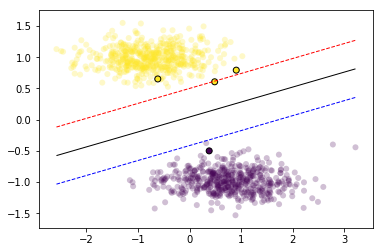

In [34]:
fig, ax = plt.subplots()
grid, ax = plot_decision_boundary(model, ax)

### gaussian kernel

In [35]:
X_train, y = make_moons(n_samples=500, noise=0.1,
                        random_state=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train, y)
y[y == 0] = -1

In [36]:
# Set model parameters and initial values
C = 1.0
m = len(X_train_scaled)
initial_alphas = np.zeros(m)
initial_b = 0.0

# Instantiate model
model = SMOModel(X_train_scaled, y, C, lambda x, y: gaussian_kernel(x, y, sigma=0.5),
                 initial_alphas, initial_b, np.zeros(m))

# Initialize error cache
initial_error = decision_function(model.alphas, model.y, model.kernel,
                                  model.X, model.X, model.b) - model.y
model.errors = initial_error

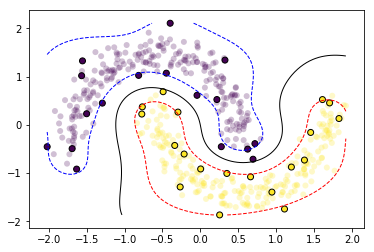

In [38]:
output = train(model)
fig, ax = plt.subplots()
grid, ax = plot_decision_boundary(model, ax)

### Experimentation with unique kernels
We can import many kernels including basic kernels like Linear kernel and some unique kernels like Tanimoto kernel from the kernel package I prepared. Let me show you how you can play with a veriety of kernels

In [ ]:
import Deep

In [1]:
from DeepEigen.kernels.regular import Tanimoto
%load_ext autoreload
%autoreload

ModuleNotFoundError: No module named 'DeepEigen'

In [170]:
C = 1000.0
m = len(X_train_scaled)
initial_alphas = np.zeros(m)
initial_b = 0.0

# Set tolerances
tol = 0.01 # error tolerance
eps = 0.01 # alpha tolerance
t = Tanimoto()                   -
# Instantiate model
model = SMOModel(X_train_scaled, y_train, C, t,
                 initial_alphas, initial_b, np.zeros(m))

# Initialize error cache
initial_error = decision_function(model.alphas, model.y, model.kernel,
                                  model.X, model.X, model.b) - model.y
model.errors = initial_error

In [171]:
output = train(model)

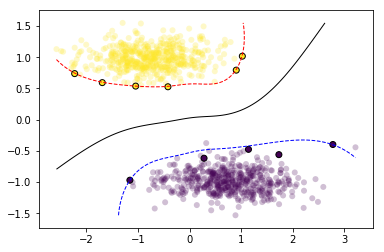

In [172]:
fig, ax = plt.subplots()
grid, ax = plot_decision_boundary(model, ax)